In [1]:
## Import Packages Necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import nltk
from nltk.stem.porter import PorterStemmer
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix,roc_auc_score,roc_curve

## Import Functions from pandas module.
import sys
sys.path.insert(1, './../../Analysis_Functions_For_Pandas')
from functions import (preview_data,
                       get_missing_counts,
                       get_value_counts,
                       get_unique_column_count,
                       get_datetimes,
                       plot_roc_curves)  

In [2]:
## Load the Data
df = pd.read_csv('.\..\Data\Finalized_DataFrame_All_Data_2_Anonymized.csv')

In [3]:
## Replace Punctuation
df['Tweet_Cleaned'] = df['Tweet'].str.replace("[^a-zA-Z#]"," ")

In [4]:
## Further clean tweet by splitting words. 
df["clean_tweet"] = df['Tweet_Cleaned'].apply(lambda x: " ".join([w for w in x.split() if len(w) >3]))

In [5]:
df.head()

,Query2,Date,Username,Tweet,TweetLikes,TweetReplies,RetweetCount,Result,Team,Tweet_Cleaned,clean_tweet
0,Arsenal until:2022-04-24,2022-04-23 23:59:47+00:00,Anonymous19203,@JackAFC01 @LUHG450 @1Thegameis Because you're...,1,1,0,1,Arsenal,JackAFC LUHG Thegameis Because you re...,JackAFC LUHG Thegameis Because arsenal have se...
1,Arsenal until:2022-04-24,2022-04-23 23:59:41+00:00,Anonymous123302,@arsenal_lady bei ihm werde ich einfach immer ...,1,0,0,1,Arsenal,arsenal lady bei ihm werde ich einfach immer ...,arsenal lady werde einfach immer schwach
2,Arsenal until:2022-04-24,2022-04-23 23:59:39+00:00,Anonymous134105,5 games to go\n\n5 cup finals \n\n5 games to U...,0,0,0,1,Arsenal,games to go cup finals games to UCL o...,games finals games either want European trips ...
3,Arsenal until:2022-04-24,2022-04-23 23:59:37+00:00,Anonymous112922,@Arsenal @HectorBellerin VAMOS @HectorBellerin...,18,0,0,1,Arsenal,Arsenal HectorBellerin VAMOS HectorBellerin...,Arsenal HectorBellerin VAMOS HectorBellerin Ev...
4,Arsenal until:2022-04-24,2022-04-23 23:59:32+00:00,Anonymous65885,@Cristiano Come to @Arsenal 🐐.. so many assist...,0,0,0,1,Arsenal,Cristiano Come to Arsenal so many assist...,Cristiano Come Arsenal many assists crosses wi...


In [7]:
import re

def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
df['clean_tweet2'] = df['Tweet'].apply(remove_usernames_links)

In [8]:
simp = df[['Username','Result','clean_tweet2','Query2']]

In [9]:
simp.loc[:,"Result"] = simp.Result.replace(1,'Win').replace(0,'Loss/Tie')

C:\Users\benja\Anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
simp.head()

,Username,Result,clean_tweet2,Query2
0,Anonymous19203,Win,Because you're arsenal and you have no self...,Arsenal until:2022-04-24
1,Anonymous123302,Win,bei ihm werde ich einfach immer schwach,Arsenal until:2022-04-24
2,Anonymous134105,Win,5 games to go\n\n5 cup finals \n\n5 games to U...,Arsenal until:2022-04-24
3,Anonymous112922,Win,"VAMOS ! Even if you stay in Spain, you'll a...",Arsenal until:2022-04-24
4,Anonymous65885,Win,Come to 🐐.. so many assists and crosses with...,Arsenal until:2022-04-24


In [11]:
n_tweets = len(simp)
n_users = simp.Username.unique().size
n_games = simp.Query2.unique().size

print("Number of tweets: {:d}".format(n_tweets))
print("Number of users: {:d}".format(n_users))
print("Number of games: {:d}".format(n_games))

Number of tweets: 370000
Number of users: 200163
Number of games: 370


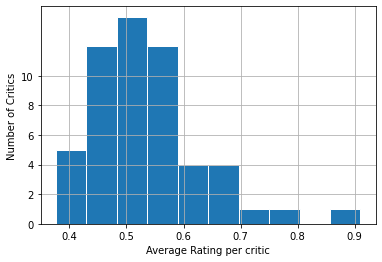

In [12]:
df = simp.copy()
df['Result'] = df.Result == 'Win'
grp = df.groupby('Username')
counts = grp.Username.count()  # number of tweets by each user
means = grp.Result.mean()     # average result for each critic

means[counts > 100].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average Rating per critic")
plt.ylabel("Number of Critics")
plt.yticks([0, 2, 4, 6, 8, 10]);

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

def make_xy(simp, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(simp.clean_tweet2)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (simp.Result == 'Win').values.astype(np.int)
    #print(vectorizer.get_feature_names())
    return X, y
X, y = make_xy(simp)

In [16]:
#your turn
#your turn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

xtrain, xtest, ytrain, ytest = train_test_split(X,y)
clf = MultinomialNB().fit(xtrain, ytrain)
train_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)
print('Multinomial Naive Bayes')
print('Accuracy on the test set: {}'.format(test_accuracy))
print('Accuracy on the training set: {}'.format(train_accuracy))

Multinomial Naive Bayes
Accuracy on the test set: 0.6214486486486487
Accuracy on the training set: 0.7024432432432433


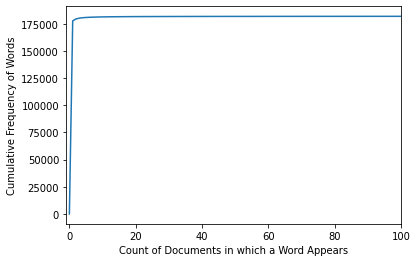

In [17]:
# Your turn.
# For each word, count the number of documents that contains it 
count = (X>0).sum(axis=0).tolist()[0]
count = sorted(count)
n = np.unique(count)

# Compute the frequency of words that appear in exactly k documents
freq, cat = np.histogram(count, bins = len(n))
cumfreq = np.cumsum(freq)
cumfreq = np.insert(cumfreq,0,0)
n = np.insert(n,0,0)

plt.plot(n,cumfreq)
plt.xlim(-1,100)
plt.xlabel('Count of Documents in which a Word Appears')
plt.ylabel('Cumulative Frequency of Words')
plt.show()

In [18]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [19]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    losstie = y == 0
    win = ~losstie
    return prob[losstie, 0].sum() + prob[win, 1].sum()

In [20]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(simp.shape[0]), train_size=0.7)
mask = np.zeros(simp.shape[0], dtype=np.bool)
mask[itest] = True

In [21]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over
alphas = [0.1, 1, 5, 10, 50]
min_dfs = [0.00001, 0.0001, 0.001, 0.01, 0.1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas: 
    for min_df in min_dfs:
        vectorizer = CountVectorizer(min_df=min_df)       
        Xthis, ythis = make_xy(simp, vectorizer)
        Xtrainthis = Xthis[mask]
        ytrainthis = ythis[mask]
        # Cross validate the NB model and compute a log likelihoood score
        clf = MultinomialNB(alpha=alpha)
        score = cv_score(clf, Xtrainthis, ytrainthis, scorefunc=log_likelihood)
        if score > maxscore:
            maxscore = score
            best_alpha = alpha
            best_min_df = min_df
    #print(alpha, best_min_df, maxscore)

In [ ]:
print("Best alpha: {}\nBest min_df: {}".format(best_alpha, best_min_df))

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(simp, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,xtest,ytest)

In [ ]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good words\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))